# Logistic Regression

#### The classification goal is to predict whether the a student will pass or not

In [22]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
data = pd.read_csv('./data/LogisticRegression_HoursPassFail.csv')
print(data.head())
print(data.columns.values)

   hours  pass
0   0.50     0
1   0.75     0
2   1.00     0
3   1.25     0
4   1.50     0
['hours' 'pass']


### Data exploration

In [24]:
print(data['pass'].value_counts())

1    10
0    10
Name: pass, dtype: int64


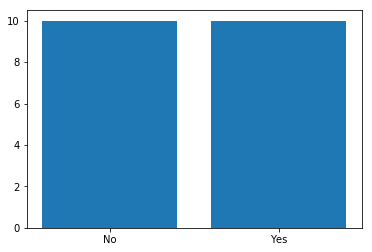

In [25]:
# lets plot the yes and no
objects = ('No', 'Yes')
y_pos = np.arange(len(objects))

plt.bar(y_pos, data['pass'].value_counts(), align="center")
plt.xticks(y_pos, objects)
plt.show()


### perform logistic regression now

In [46]:
X=data['hours']
y=data['pass']

#print(X)
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y, test_size=0.2, random_state=0)

#print(y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

https://en.wikipedia.org/wiki/Logistic_regression#Example:_Probability_of_passing_an_exam_versus_hours_of_study

Text(0.5,1,'Logistic regression model')

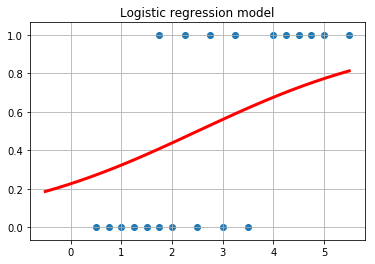

In [47]:
plt.scatter(data['hours'], data['pass'], linestyle='None', marker='o')
plt.grid()

#plotting logit function
l = np.linspace(data['hours'].min()-1, data['hours'].max(), 300)

def logit_model(x):
    return 1 / (1 + np.exp(-x))

loss = logit_model(l * logreg.coef_ + logreg.intercept_).ravel()
plt.plot(l, loss, color='red', linewidth=3)
plt.title("Logistic regression model")

In [48]:
y_pred = logreg.predict(X_test)
# list(y_pred)
print('Accuracy %.6f'% (logreg.score(X_test, y_test)))

Accuracy 0.750000


### Confusion Matrix

In [49]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[1, 0],
       [1, 2]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4



### ROC Curve

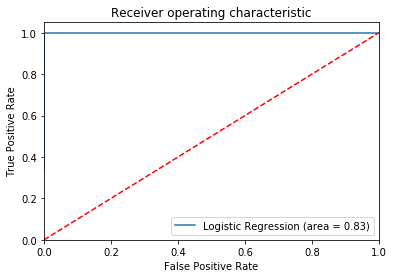

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()